# <center >Topic 4 HW<center>
 <center> Zander Bonnet <center>
    <center> March 13, 2024 <center>

In this assignment, you will create effective data visualizations for a given dataset using Python libraries like Matplotlib, Seaborn, or Plotly. You will apply principles of chart design to evaluate and improve the effectiveness of data visualizations, and communicate data insights to a specific audience using appropriate language and visual cues.


# Video: https://vimeo.com/923164529/93e4ff05c8?share=copy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in dataset
pok = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/Pokemon.csv')
pok.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
#fix the type 2 variable as not all pokemon have a second type
pok['Type 2'] = pok['Type 2'].fillna("No Type")
pok.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,No Type,309,39,52,43,60,50,65,1,False


# Correlation Heatmap

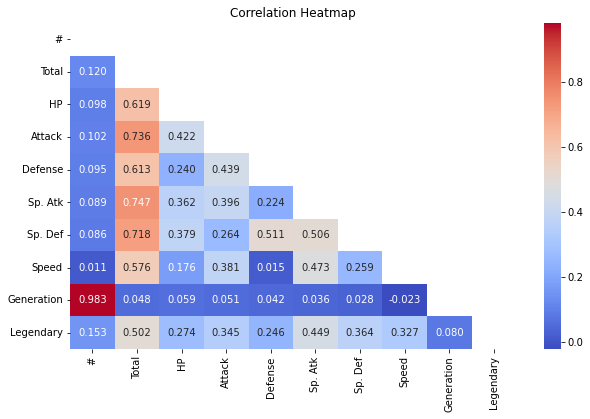

In [4]:
# Calculate the correlation matrix
corr_matrix = pok.corr()
#Finds the values to omit from the heatmap
mask = np.triu(np.ones_like(corr_matrix))
# Generate a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, mask = mask)
plt.title('Correlation Heatmap')
plt.savefig('corr.jpg')
plt.show()

# Pairplots

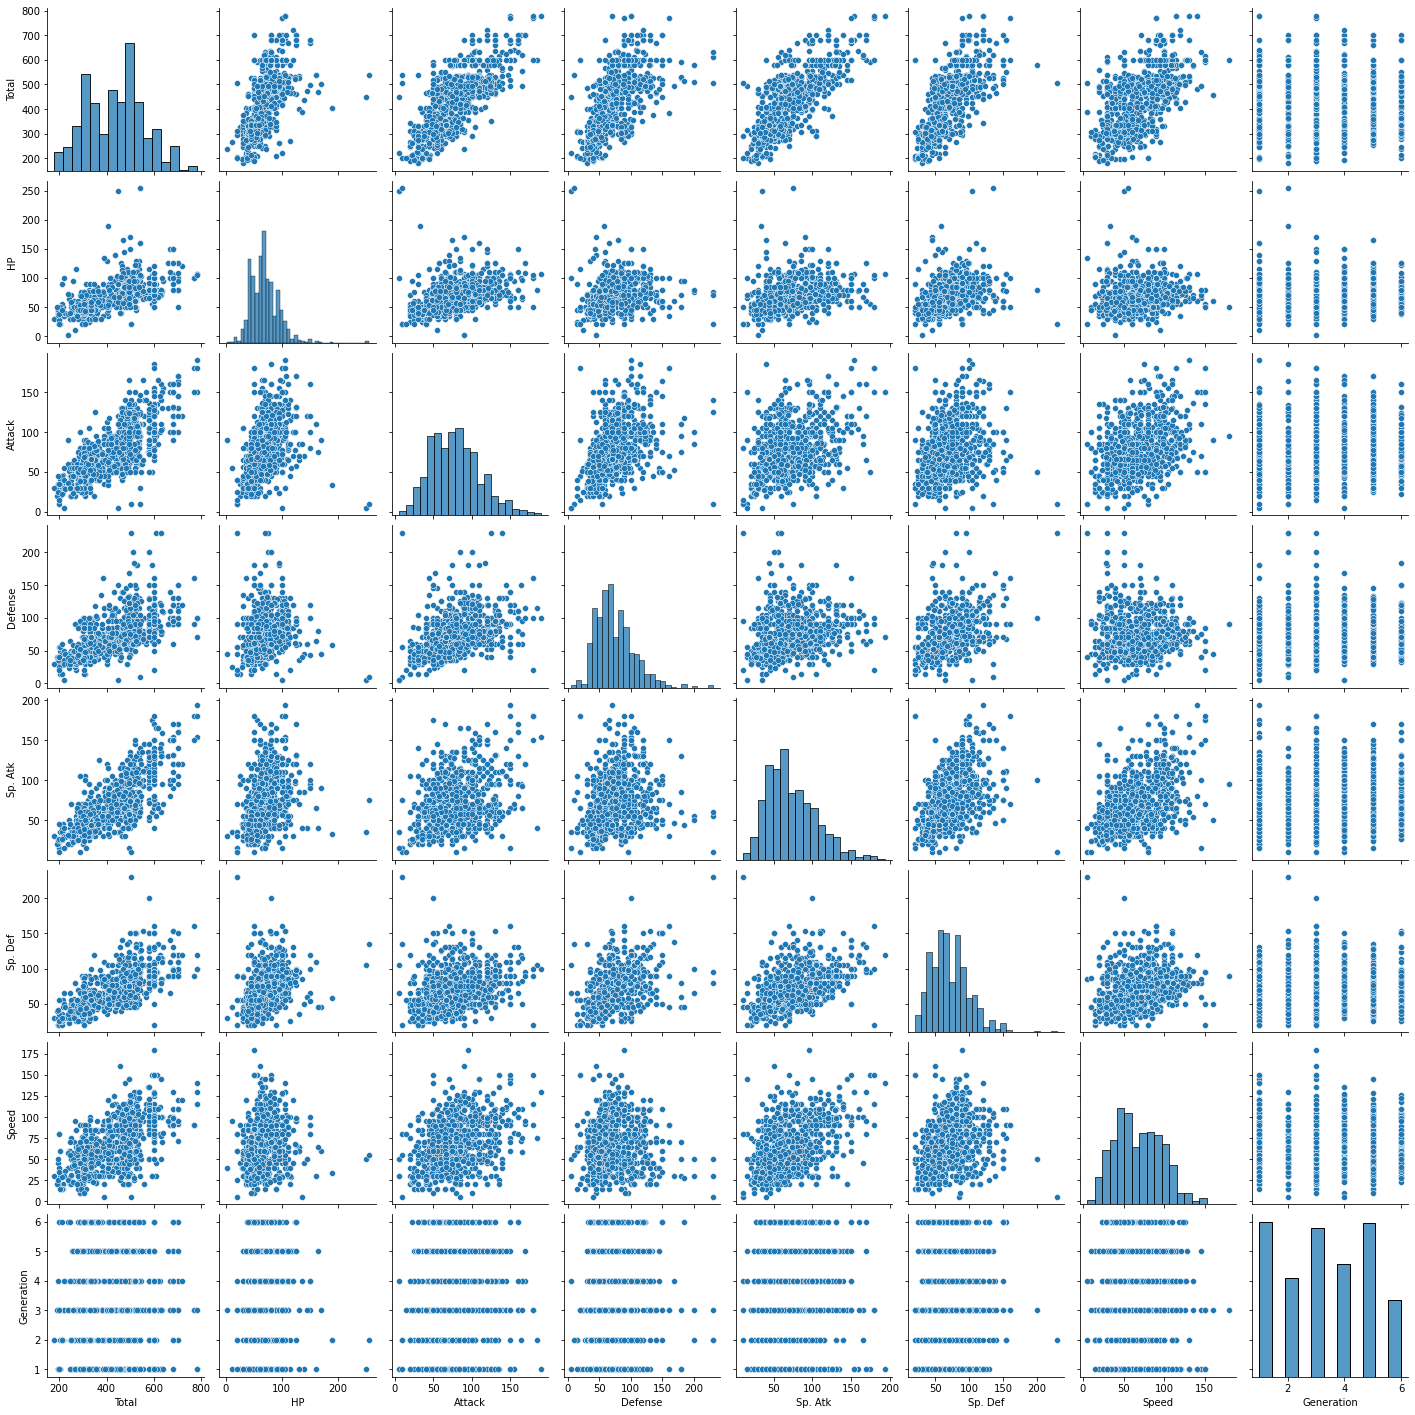

In [5]:
#plots all the numerical data
var = ['Total', 'HP', "Attack", 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
sns.pairplot(pok[var])
plt.show()

# Type 1 and Type 2
Type 1: 1,
Type 2 :1

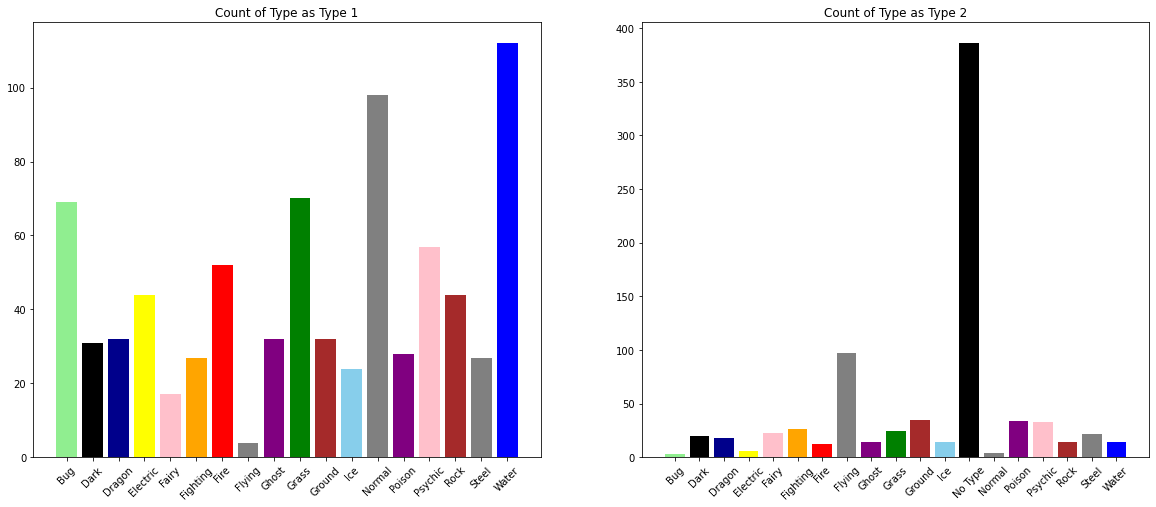

In [21]:
#plots the counts of the various types as type one vs type two
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
col = [
    'lightgreen', 'black', 'darkblue', 'yellow', 'pink',
    'orange', 'red', 'grey', 'purple', 'green', 'brown',
    'skyblue', 'grey', 'purple', 'pink', 'brown', 'grey', 'blue'
]
names = list(pok.groupby('Type 1').count()['#'].index)
count = list(pok.groupby('Type 1').count()['#'])
ax1.bar(names, count, color = col)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.title.set_text('Count of Type as Type 1')

col = [
    'lightgreen', 'black', 'darkblue', 'yellow', 'pink',
    'orange', 'red', 'grey', 'purple', 'green', 'brown',
    'skyblue','black', 'grey', 'purple', 'pink', 'brown', 'grey', 'blue'
]

names = list(pok.groupby('Type 2').count()['#'].index)
count = list(pok.groupby('Type 2').count()['#'])
ax2.bar(names, count, color = col)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax2.title.set_text('Count of Type as Type 2')
plt.savefig('TypePlots.jpg')
plt.show()

# Type 2 by Generation
Type 1: 1,
Type 2 :2,
Generation: 1

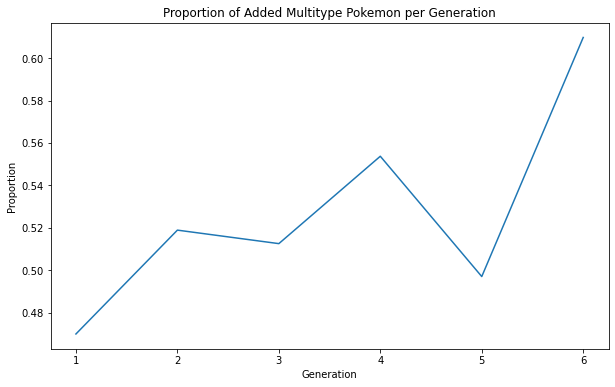

In [22]:
#gets the proportion of pokemon that have two types per generation
data = (pok[pok['Type 2'] != 'No Type'].groupby('Generation').count()/pok.groupby('Generation').count())['#']
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Proportion of Added Multitype Pokemon per Generation')
plt.xlabel('Generation')
plt.ylabel('Proportion')
plt.savefig('multitypepergen.jpg')
plt.show()

# Type 2 Based on Type 1 
Type 1: 2,
Type 2 :3,
Generation: 1

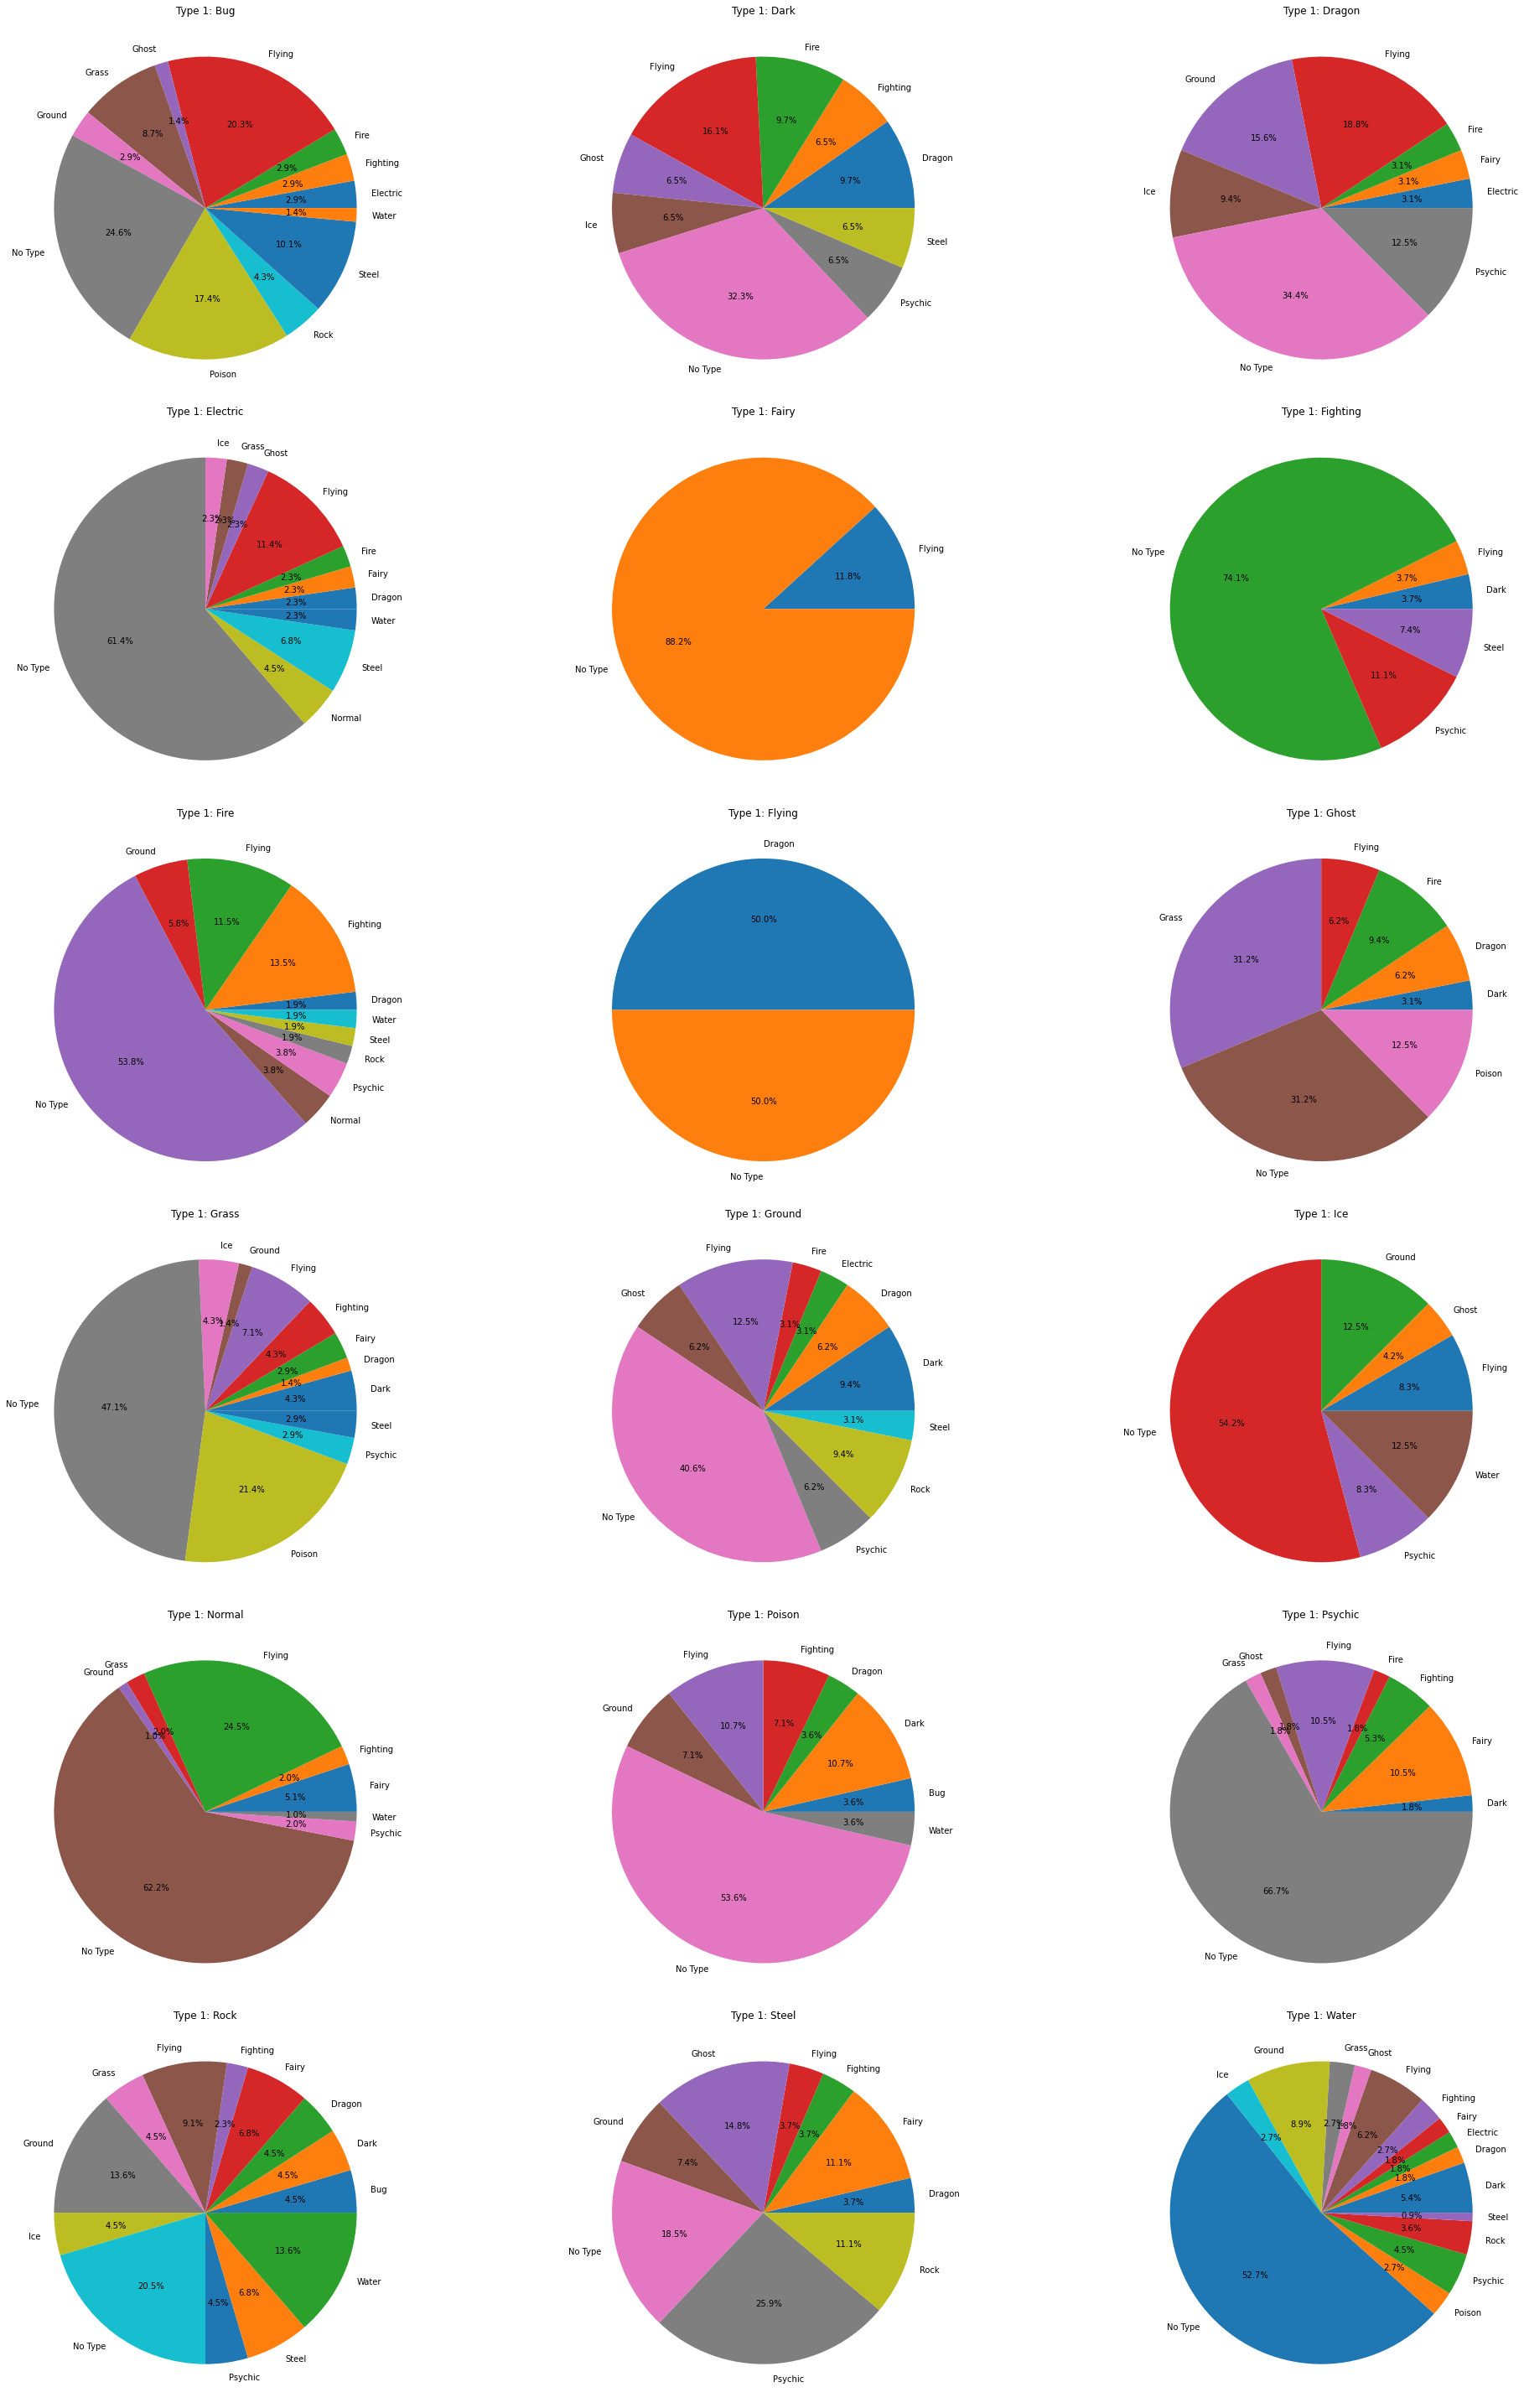

In [8]:
#Gets a pie chart for the distributions fo type 2 based on type 1
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30,40))
names = list(pok.groupby('Type 1').count()['#'].index)

for r in range(0,6):
    for c in range(0,3):
        data = pok.loc[pok['Type 1'] == names[(r*3)+c]]
        
        name = list(data.groupby('Type 2').count()['#'].index)
        count = data.groupby('Type 2').count()['#']
        
        axes[r,c].pie(count, labels  = name, autopct='%1.1f%%')
        axes[r,c].title.set_text('Type 1: {}'.format(names[(r*3)+c]))
        
fig.tight_layout()
plt.show()

# Total Power
Type 1: 2,
Type 2 :3,
Power : 1,
Generation: 1

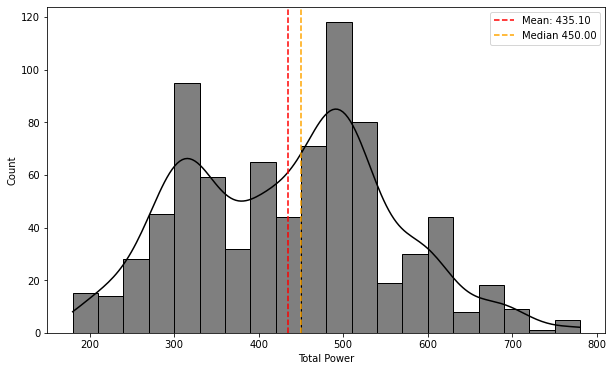

In [23]:
#Plots the distribution of Total Power
plt.figure(figsize = (10,6))
sns.histplot(pok['Total'], bins =20, kde = True, color = 'black')
plt.axvline(
    pok['Total'].mean(),linestyle = 'dashed', color = 'red',
    label = 'Mean: {:.2f}'.format(pok['Total'].mean())
)
plt.axvline(
    np.median(pok['Total']),linestyle = 'dashed', 
    color = 'orange', label = 'Median {:.2f}'.format(np.median(pok['Total']))
)
plt.xlabel('Total Power')
plt.legend()
plt.savefig('powerhist.jpg')
plt.show()

# Average Total Power by Type per Generation 
Type 1: 3,
Type 2 :3,
Power : 2,
Generation: 2

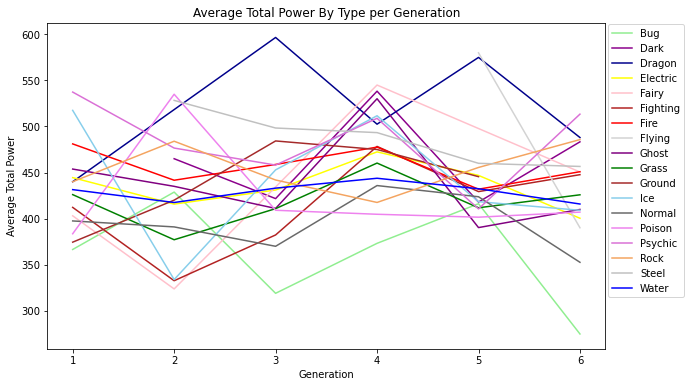

In [10]:
#plots the average total power for each individual type 1 by generation

#Creates a mapto assign colors
col = {
    'Bug':'lightgreen', 'Dark':'darkmagenta', 'Dragon':'darkblue', 'Electric':'yellow', 
    'Fairy':'pink', 'Fighting':'firebrick','Fire' :'red', 'Flying':'lightgrey', 
    'Ghost': 'purple', 'Grass': 'green', 'Ground':'brown',
    'Ice':'skyblue', 'Normal':'dimgrey', 'Poison':'violet', 'Psychic':'orchid',
    'Rock':'sandybrown', 'Steel':'silver', 'Water':'blue'
}

names = list(pok.groupby('Type 1').count()['#'].index)
plt.figure(figsize = (10,6))

for n in names:
    d = pok[pok['Type 1'] == n]
    plt.plot(d.groupby('Generation')['Total'].mean(), label = n, color = col[n])
    

plt.legend(loc = 'upper right', bbox_to_anchor = (1.15,1.01))
plt.ylabel('Average Total Power')
plt.xlabel('Generation')
plt.title('Average Total Power By Type per Generation')
plt.show()

# HP Vs. Defense
Type 1: 3,
Type 2 :3,
Power : 2,
HP: 1,
Defense: 1
Generation: 2

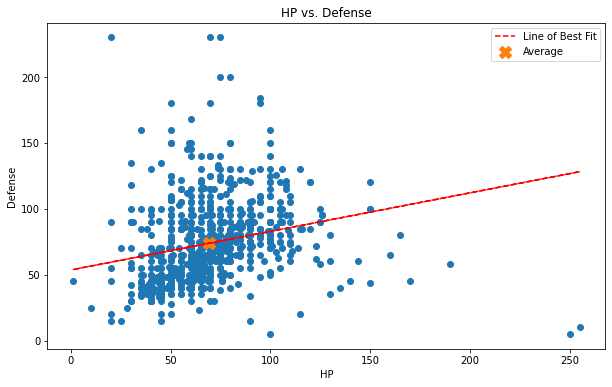

In [11]:
plt.figure(figsize = (10,6))
plt.scatter(pok['HP'], pok['Defense'])
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('HP vs. Defense')

a,b = np.polyfit(pok['HP'], pok['Defense'], 1) #makes a LOBF
#plots the LOBF
plt.plot(pok['HP'], a*pok['HP']+b, linestyle = '--', color = 'red', label = 'Line of Best Fit')

#Plots the average point
plt.scatter(pok['HP'].mean(), pok['Defense'].mean() , label = 'Average', s = 150, marker = 'X')

plt.legend()
plt.savefig('HpVsDef.jpg')
plt.show()

# Distribution of HP Legendary Vs. Not Legendary
Type 1: 3,
Type 2 :3,
Power : 2,
HP: 2,
Defense: 1
Generation: 2
Legendary : 1

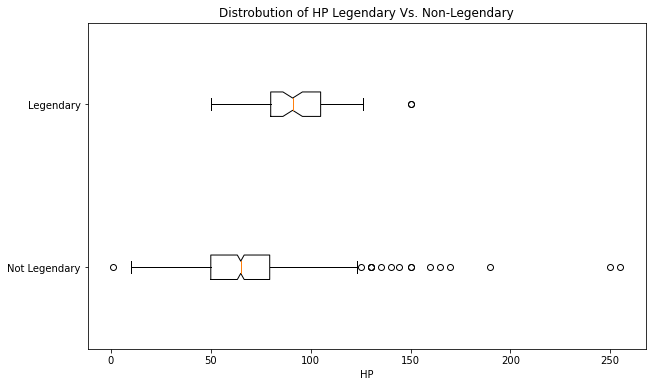

In [12]:
plt.figure(figsize = (10,6))

#plots the hp distrobution of legendary and non legendary pokemon
plt.boxplot(
    [pok[pok['Legendary'] == False]['HP'], 
     pok[pok['Legendary'] == True]['HP']],
    vert = False, notch = True, labels = ['Not Legendary', 'Legendary']
)

plt.xlabel('HP')
plt.title('Distrobution of HP Legendary Vs. Non-Legendary')

plt.show()

# Distribution of Total Power Legendary Vs. Not Legendary
Type 1: 3,
Type 2 :3,
Power : 3,
HP: 2,
Defense: 1
Generation: 2
Legendary : 2

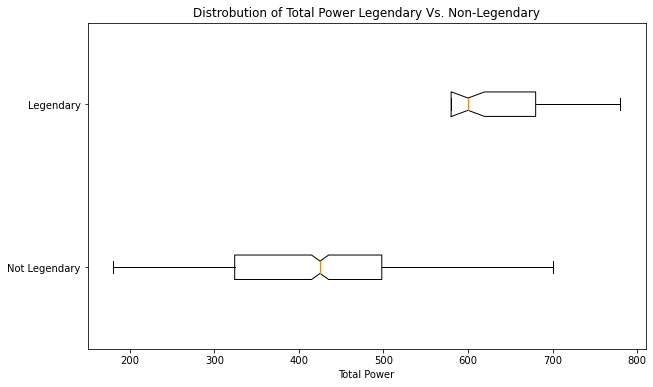

In [13]:
plt.figure(figsize = (10,6))

#plots the hp distrobution of legendary and non legendary pokemon
plt.boxplot(
    [pok[pok['Legendary'] == False]['Total'], 
     pok[pok['Legendary'] == True]['Total']]
    ,vert = False, notch = True, labels = ['Not Legendary', 'Legendary']
)

plt.xlabel('Total Power')
plt.title('Distrobution of Total Power Legendary Vs. Non-Legendary')
plt.savefig('BoxplotPower.jpg')
plt.show()

# Attack Vs. Speed Legendary Vs. Not Legendary
Type 1: 3,
Type 2 :3,
Power : 3,
HP: 2,
Attack: 1,
Defense: 1,
Speed: 1,
Generation: 2,
Legendary : 3

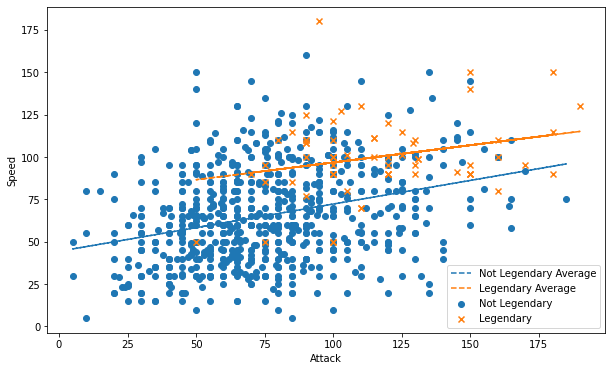

In [14]:
#plots attack vs speed
plt.figure(figsize = (10,6))
plt.xlabel('Attack')
plt.ylabel('Speed')
#non legendary points
plt.scatter(
    pok[pok['Legendary'] == False]['Attack'], pok[pok['Legendary'] == False]['Speed'],
    label = 'Not Legendary'
)
#non legendary LOBF
a,b = np.polyfit(pok[pok['Legendary'] == False]['Attack'], pok[pok['Legendary'] == False]['Speed'], 1)
plt.plot(
    pok[pok['Legendary'] == False]['Attack'], a*pok[pok['Legendary'] == False]['Attack']+b,
    linestyle = '--', label = 'Not Legendary Average'
)
#legendary points
plt.scatter(
    pok[pok['Legendary'] == True]['Attack'], pok[pok['Legendary'] == True]['Speed'],
    marker = 'x', label = 'Legendary'
)
#legendary LOBF
a,b = np.polyfit(pok[pok['Legendary'] == True]['Attack'], pok[pok['Legendary'] == True]['Speed'], 1)
plt.plot(
    pok[pok['Legendary'] == True]['Attack'], a*pok[pok['Legendary'] == True]['Attack']+b,
    linestyle = '--', label = 'Legendary Average'
)

plt.legend()
plt.show()

# Attack by Type
Type 1: 4,
Type 2 :3,
Power : 2,
HP: 2,
Attack: 2,
Defense: 1,
Speed: 1,
Generation: 2,
Legendary : 3

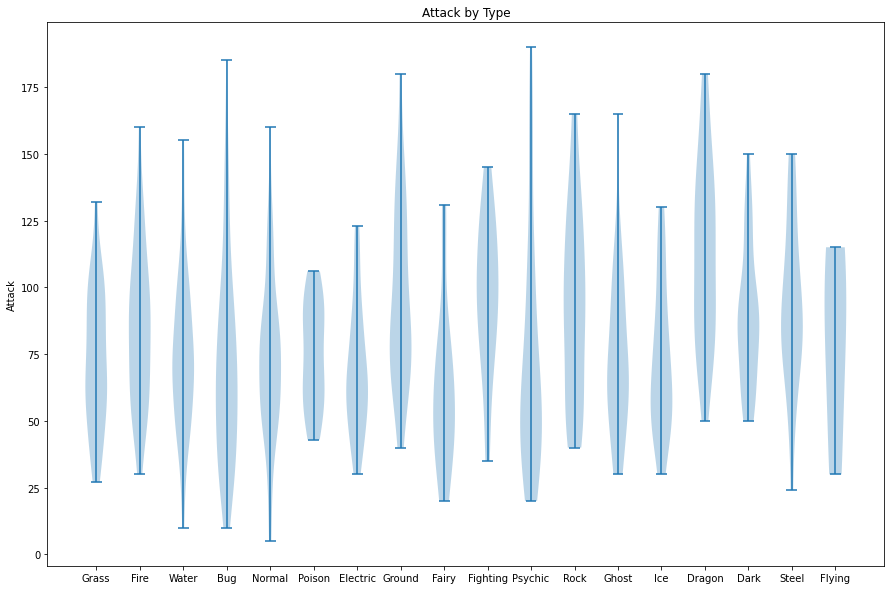

In [15]:
#plots the distribution of attack by type
plt.figure(figsize = (15,10))
types = []

for ty in list(pok['Type 1'].unique()):
    types.append(list(pok[pok['Type 1'] == ty]['Attack'])) # Gets the attack values
plt.violinplot(types)


plt.xticks([y + 1 for y in range(len(types))],
                  labels=list(pok['Type 1'].unique())) # Sets the x values

plt.title('Attack by Type')
plt.ylabel('Attack')
plt.show()

# Defense Vs. Special Defense Vs. Speed
Type 1: 4,
Type 2 :3,
Power : 3,
HP: 2,
Attack: 2,
Defense: 2,
Sp. Def: 1,
Speed: 2,
Generation: 2,
Legendary : 3

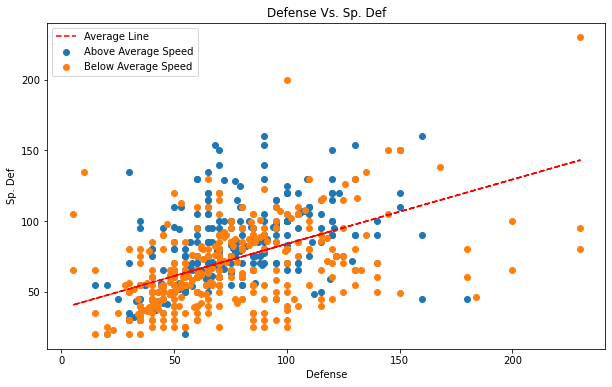

In [16]:
plt.figure(figsize=(10, 6))

upspeed = pok[pok['Speed'] >= pok['Speed'].mean()] # Gets the above average speed
lowspeed = pok[pok['Speed'] < pok['Speed'].mean()] # Gets bellow average speed

plt.scatter(upspeed['Defense'], upspeed['Sp. Def'], label = 'Above Average Speed')
plt.scatter(lowspeed['Defense'], lowspeed['Sp. Def'], label = 'Below Average Speed')

#LOBF for Defense vs SP. Def
a,b = np.polyfit(pok['Defense'], pok['Sp. Def'], 1)
plt.plot(
    pok['Defense'], a*pok['Defense']+b,
    linestyle = '--', color = 'red',label = 'Average Line'
)
plt.title("Defense Vs. Sp. Def")
plt.xlabel('Defense')
plt.ylabel('Sp. Def')
plt.legend()
plt.show()

# Attack Vs Special Attack
Type 1: 4,
Type 2 :3,
Power : 3,
HP: 2,
Attack: 3,
Defense: 2,
Sp. Atk: 1
Sp. Def: 1,
Speed: 2,
Generation: 2,
Legendary : 3

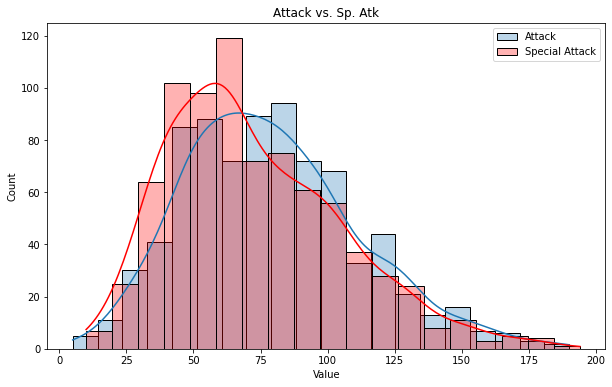

In [17]:
#hist for attack vs sp. atk
plt.figure(figsize=(10, 6))
sns.histplot(pok['Attack'], alpha = .3, label = 'Attack', kde = True)
sns.histplot(pok['Sp. Atk'], alpha = .3, color = 'red', label = 'Special Attack', kde = True)
plt.legend()
plt.title('Attack vs. Sp. Atk')
plt.xlabel('Value')
plt.savefig('HistOver.jpg')
plt.show()

# Sp. Atk vs Sp. Def
Type 1: 4,
Type 2 :3,
Power : 3,
HP: 2,
Attack: 3,
Defense: 2,
Sp. Atk: 2,
Sp. Def: 2,
Speed: 2,
Generation: 2,
Legendary : 3

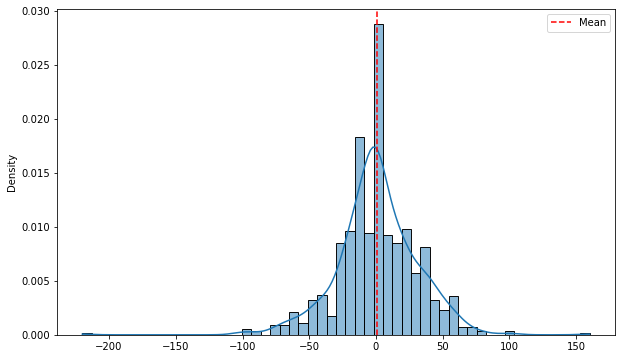

In [18]:
plt.figure(figsize=(10, 6))
data = pok['Sp. Atk'] - pok['Sp. Def'] #Difference in Sp. Atk and Sp. Def
sns.histplot(data, kde = True, stat = 'density')
plt.axvline(data.mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()

# Total Power vs Attack by Type
Type 1: 5,
Type 2 :3,
Power : 4,
HP: 2,
Attack: 4,
Defense: 2,
Sp. Atk: 2,
Sp. Def: 2,
Speed: 2,
Generation: 2,
Legendary : 3

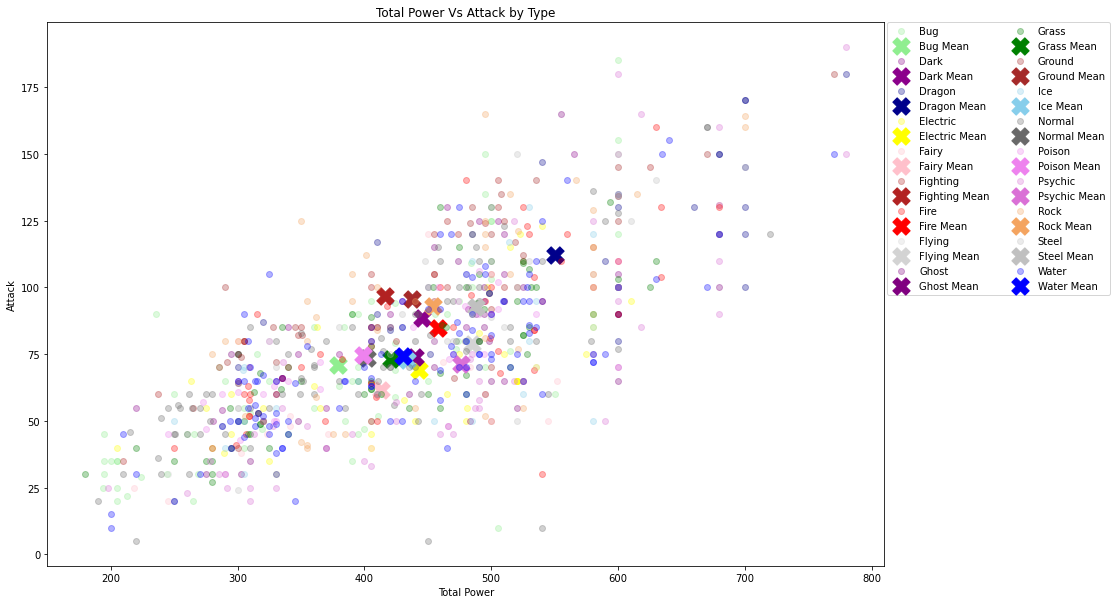

In [19]:
col = {
    'Bug':'lightgreen', 'Dark':'darkmagenta', 'Dragon':'darkblue', 'Electric':'yellow', 
    'Fairy':'pink', 'Fighting':'firebrick','Fire' :'red', 'Flying':'lightgrey', 
    'Ghost': 'purple', 'Grass': 'green', 'Ground':'brown',
    'Ice':'skyblue', 'Normal':'dimgrey', 'Poison':'violet', 'Psychic':'orchid',
    'Rock':'sandybrown', 'Steel':'silver', 'Water':'blue'
}
plt.figure(figsize=(15, 10))

names = list(pok.groupby('Type 1').count()['#'].index)
#plots for each type 1
for n in names:
    data = pok[pok['Type 1'] == n]
    plt.scatter(data['Total'], data['Attack'], c = col[n], label = n, alpha = .3)
    #plots average point for each type 1
    plt.scatter(
        data['Total'].mean(), data['Attack'].mean(), c = col[n], 
        label = '{} Mean'.format(n), marker = 'X', s= 300
    )
    
plt.legend(loc = 'upper right', bbox_to_anchor = (1.275,1.01), ncol = 2)
plt.title('Total Power Vs Attack by Type')
plt.xlabel('Total Power')
plt.ylabel('Attack')
plt.savefig('powerscat.png')
plt.show()

# Total Power vs Defense by Type
Type 1: 5,
Type 2 :3,
Power : 5,
HP: 2,
Attack: 4,
Defense: 3,
Sp. Atk: 2,
Sp. Def: 2,
Speed: 2,
Generation: 2,
Legendary : 3

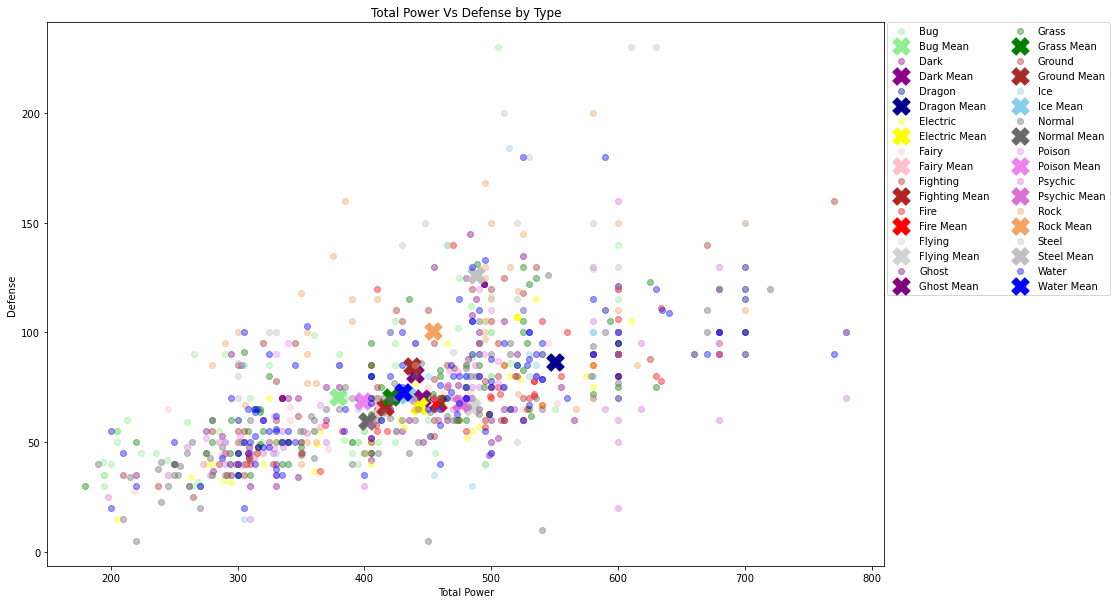

In [20]:
col = {
    'Bug':'lightgreen', 'Dark':'darkmagenta', 'Dragon':'darkblue', 'Electric':'yellow', 
    'Fairy':'pink', 'Fighting':'firebrick','Fire' :'red', 'Flying':'lightgrey', 
    'Ghost': 'purple', 'Grass': 'green', 'Ground':'brown',
    'Ice':'skyblue', 'Normal':'dimgrey', 'Poison':'violet', 'Psychic':'orchid',
    'Rock':'sandybrown', 'Steel':'silver', 'Water':'blue'
}
plt.figure(figsize=(15, 10))

names = list(pok.groupby('Type 1').count()['#'].index)
#plots for each type 1
for n in names:
    data = pok[pok['Type 1'] == n]
    plt.scatter(data['Total'], data['Defense'], c = col[n], label = n, alpha = .4)
    #plots average for each type 1
    plt.scatter(data['Total'].mean(), data['Defense'].mean(), c = col[n], 
                label = '{} Mean'.format(n), marker = 'X', s= 300)
    
plt.legend(loc = 'upper right', bbox_to_anchor = (1.275,1.01), ncol = 2)
plt.title('Total Power Vs Defense by Type')
plt.xlabel('Total Power')
plt.ylabel('Defense')
plt.show()

References: 

Pokemon with stats. (2016). Kaggle [Dataset]. https://www.kaggle.com/datasets/abcsds/pokemon/data.

Rogel-Salazar, J. (2023). Statistics and Data Visualization with Python.  CRC Press.